**NO CONSIDERAR**

**classf1 - Modelo 3**

In [46]:
import sys
import os

sys.path.append(os.path.abspath('../package'))
%load_ext autoreload
%autoreload 2

from functions.data_loader import load_excel_data
file = "../../data/BASE DE DATOS PCC_cleaned.xlsx"
df_char = load_excel_data(file)
df_model = df_char.copy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Archivo cargado correctamente desde ../../data/BASE DE DATOS PCC_cleaned.xlsx


In [52]:
group_columns = ['referencia','maquina','proceso'] #This are the columns to group by to compare similar work conditions

df_model['grupo'] = df_model[group_columns].astype(str).agg('-'.join, axis=1)
medians = df_model.groupby('grupo')['eficiencia_piezas_por_min'].transform('median')

df_model['is_optimal_shift'] = df_model['eficiencia_piezas_por_min'] > medians

df_model['optimal_shift'] = df_model.apply(
    lambda row: row['turno'] if row['is_optimal_shift'] else None,
    axis=1
)

In [53]:
df_model = df_model[df_model['optimal_shift'].notnull()].copy()
df_model


,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno,grupo,is_optimal_shift,optimal_shift
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche,PT-0000000388-MAQR700 - Maquina R700 6 color +...,True,Noche
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,19,Monday,2023-08-14,21,Monday,439.219512,Tarde,PT-0000001497-MAQR700 - Maquina R700 6 color +...,True,Tarde
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche,PT-0000001327-MAQR700 - Maquina R700 6 color +...,True,Noche
17,27316,8483,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,102880.0,2023-09-14 02:04:14,...,2,Thursday,2023-09-14,5,Thursday,483.276964,Noche,PT-0000001497-MAQR700 - Maquina R700 6 color +...,True,Noche
20,27325,8493,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,28000.0,2023-09-13 17:21:25,...,17,Wednesday,2023-09-13,18,Wednesday,330.500472,Tarde,PT-0000001497-MAQR700 - Maquina R700 6 color +...,True,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,30456,11737,PT-0000002091,BOBST1080 - Troqueladora Bobst 1080,Troquelado,Troquelar,jacevedo,play,16140.0,2024-12-21 09:10:46,...,9,Saturday,2024-12-21,10,Saturday,286.576705,Mañana,PT-0000002091-BOBST1080 - Troqueladora Bobst 1...,True,Mañana
8426,30488,11767,PT-0000002064,BOBST102 - Troqueladora Bobst 102,Troquelado,Troquelar,jcacevedo,play,50058.0,2024-12-15 06:31:47,...,6,Sunday,2024-12-15,8,Sunday,378.510397,Mañana,PT-0000002064-BOBST102 - Troqueladora Bobst 1...,True,Mañana
8427,30489,11766,PT-0000002065,BOBST102 - Troqueladora Bobst 102,Troquelado,Troquelar,jacevedo,play,51160.0,2024-12-12 12:43:25,...,12,Thursday,2024-12-12,15,Thursday,345.909398,Tarde,PT-0000002065-BOBST102 - Troqueladora Bobst 1...,True,Tarde
8444,30513,11793,PT-0000002078,BOBST1080 - Troqueladora Bobst 1080,Troquelado,Troquelar,lvelasquez,play,4590.0,2024-12-18 00:00:00,...,0,Wednesday,2024-12-18,0,Wednesday,261.092150,Noche,PT-0000002078-BOBST1080 - Troqueladora Bobst 1...,True,Noche


In [ ]:
from functions.data_preparation import prepare_classification_data


features = {
    'referencia': 'categorical',
    'maquina': 'categorical',
    'seccion': 'categorical',
    'proceso': 'categorical',
    'usuario': 'categorical',
    'dia_semana_inicio': 'categorical'
}

X_train, X_test, y_train, y_test, encoder_X, encoder_y, scaler = prepare_classification_data(
    df=df_model,
    feature_types=features,
    target_column='turno',
    test_size=0.2,
    random_state=42,
    scale_numeric=True
)


Data prepared: 1058 training samples, 265 test samples.
Categorical features encoded: ['referencia', 'maquina', 'seccion', 'proceso', 'usuario', 'dia_semana_inicio']


In [ ]:
from functions.data_preparation import select_features_multinomial_logit
significant_features, logistic_model = select_features_multinomial_logit(X_train, y_train)

Logistic Regression p-values:
referencia           0.999962
maquina              0.999986
seccion              0.999989
proceso              0.999977
usuario              0.999973
dia_semana_inicio    0.999986
dtype: float64

Significant features (p <= 0.05):
[]


c:\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:22

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],  
            'penalty': ['l2'],             
            'solver': ['lbfgs']            
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3, 5, 7, 9, 11,15,20],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}


In [ ]:
from functions.model_evaluation import evaluate_classification_models

X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]

tuned_results, summary_metrics, all_grid_results, best_models = evaluate_classification_models(
    models=models,
    X_train=X_train_selected,
    y_train=y_train,
    X_test=X_test_selected,
    y_test=y_test,
    scoring="roc_auc_ovr_weighted",
    cv=5
)


Evaluating: LogisticRegression


C:\Users\yosse\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yosse\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best Params          {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy CV                                              0.399722
Precision CV                                             0.377177
Recall CV                                                0.399722
F1 Score CV                                              0.365993
Accuracy Test                                            0.391667
Precision Test                                           0.365739
Recall Test                                              0.391667
F1 Score Test                                            0.360251
Training Time (s)                                        3.313449
dtype: object


Evaluating: RandomForest
Best Params          {'max_depth': 10, 'min_samples_split': 5, 'n_e...
Accuracy CV                                                   0.432395
Precision CV                                                  0.431161
Recall CV                                                     0.432395
F1 Score CV    

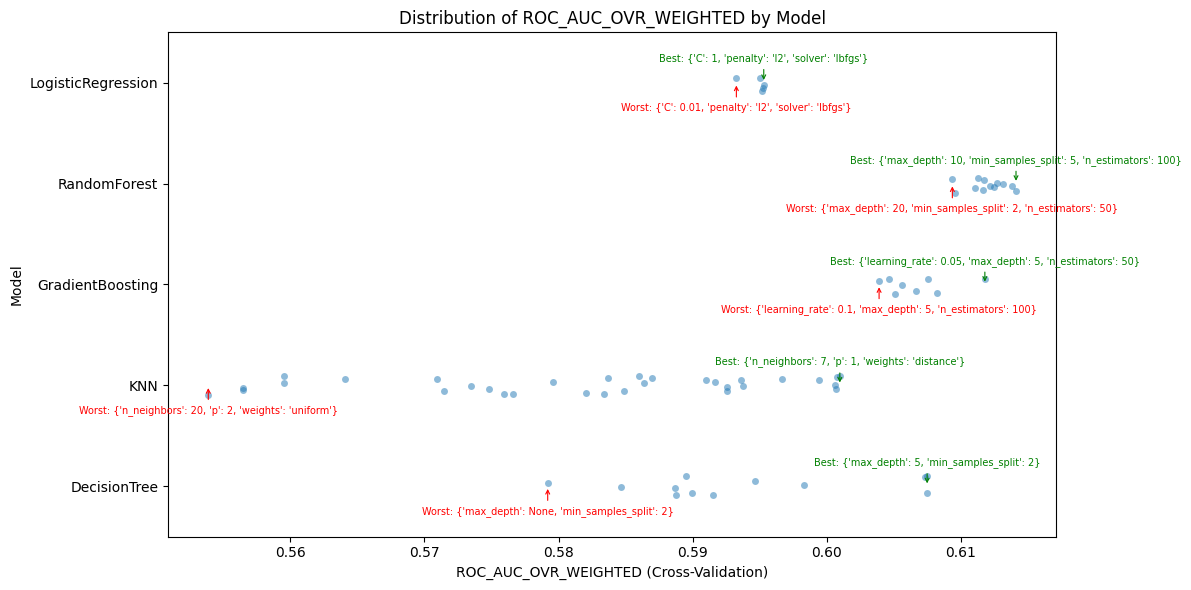

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,rank_test_score,Model,param_max_depth,param_min_samples_split,param_n_estimators,param_learning_rate,param_n_neighbors,param_p,param_weights,roc_auc_ovr_weighted
0,1.108266,0.572315,0.009185,0.001138,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.599272,0.594091,...,5,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593259
1,1.367242,0.640698,0.009627,0.001289,0.10,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.603292,0.600830,...,4,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594994
2,1.047561,0.551064,0.009235,0.001309,1.00,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.603649,0.601766,...,1,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595302
3,0.842582,0.067341,0.010853,0.001449,10.00,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.603644,0.601087,...,3,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595173
4,0.763536,0.038148,0.006189,0.001124,100.00,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.603543,0.601550,...,2,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.007632,0.000335,0.007506,0.000355,NaN,NaN,NaN,"{'max_depth': 10, 'min_samples_split': 5}",0.622173,0.577717,...,8,DecisionTree,10,5.0,NaN,NaN,NaN,NaN,NaN,0.589538
65,0.007212,0.000424,0.009362,0.002798,NaN,NaN,NaN,"{'max_depth': 10, 'min_samples_split': 10}",0.631136,0.579039,...,7,DecisionTree,10,10.0,NaN,NaN,NaN,NaN,NaN,0.589980
66,0.012940,0.002653,0.008790,0.001267,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 2}",0.582367,0.566926,...,11,DecisionTree,20,2.0,NaN,NaN,NaN,NaN,NaN,0.584630
67,0.012327,0.003589,0.006986,0.000755,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 5}",0.596050,0.574562,...,6,DecisionTree,20,5.0,NaN,NaN,NaN,NaN,NaN,0.591493


In [43]:
from functions.plotter import plot_cv_metric_distribution
plot_cv_metric_distribution([all_grid_results], metric_name="roc_auc_ovr_weighted", maximize=True)

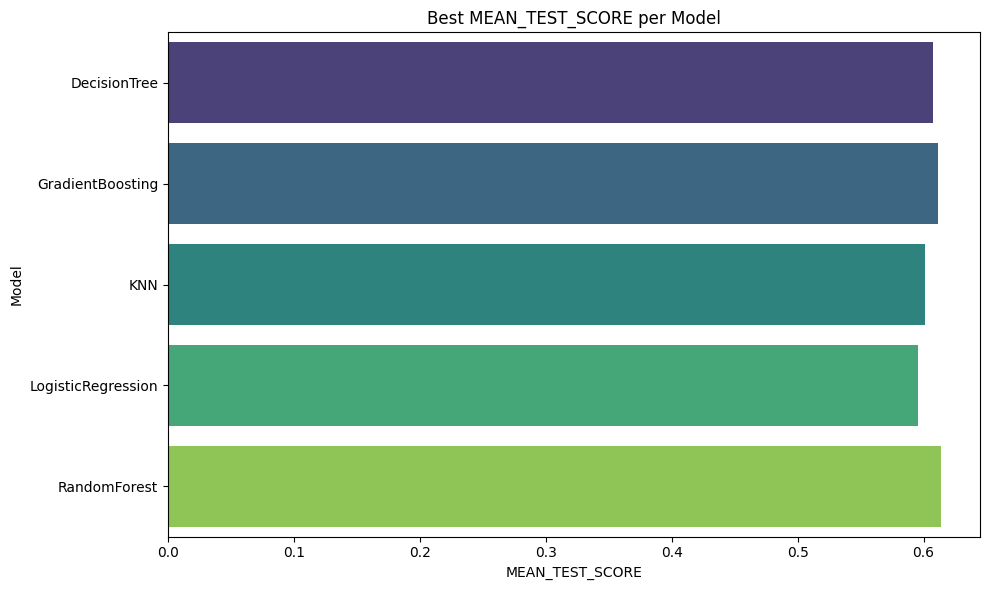

In [44]:
from functions.plotter import plot_best_metric_per_model
best_rmse_df = plot_best_metric_per_model([all_grid_results], metric='mean_test_score', maximize=True)

In [45]:
from functions.save_models import save_pipeline_models_categorical_y
save_path = "./results/classf1"
save_pipeline_models_categorical_y(encoder_X,encoder_y, scaler, best_models, save_path)

Guardado: ./results/classf1\LogisticRegression_pipeline.joblib
Guardado: ./results/classf1\RandomForest_pipeline.joblib
Guardado: ./results/classf1\GradientBoosting_pipeline.joblib
Guardado: ./results/classf1\KNN_pipeline.joblib
Guardado: ./results/classf1\DecisionTree_pipeline.joblib
